In [21]:
!mkdir -p ~/.kaggle
!cp kaggle-2.json ~/.kaggle/


In [22]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
covid19-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
import zipfile
zip_file=zipfile.ZipFile('/content/covid19-image-dataset.zip')
zip_file.extractall('/content')
zip_file.close()

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image


In [25]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_path='/content/Covid19-dataset/train'
test_path='/content/Covid19-dataset/test'

In [ ]:
image_in_classs=os.listdir('/content/Covid19-dataset/test')
image_in_classs

['Viral Pneumonia', 'Normal', 'Covid']

In [26]:
def get_images_from_class(directory,classes):
  plt.figure(figsize=(12,4))

  for i,class_name in enumerate(classes):
    class_path =os.path.join(directory,class_name)

    class_images=os.listdir(class_path)
    image_path=os.path.join(class_path,class_images[0])

    img=Image.open(image_path)

    plt.subplot(1,len(classes),i+1)

    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

  plt.show()


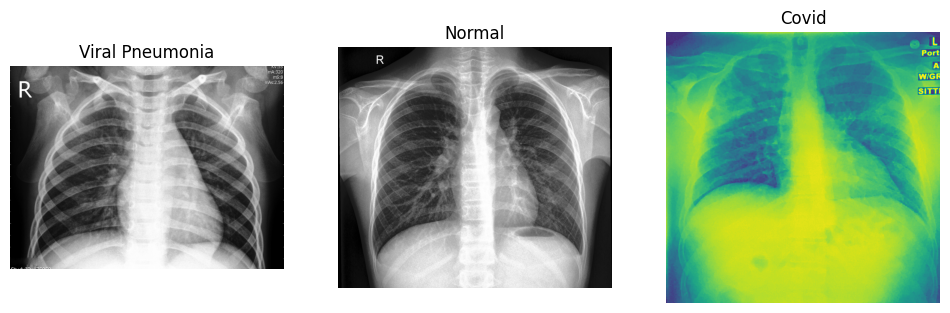

In [27]:
get_images_from_class(train_path,image_in_classs)

In [28]:
image_genrator=ImageDataGenerator(rescale=1/255)

In [29]:
train_data=image_genrator.flow_from_directory(train_path,
                                              target_size=(512,512),
                                              batch_size=16,
                                              class_mode='categorical')

Found 251 images belonging to 3 classes.


In [30]:
test_data=image_genrator.flow_from_directory(test_path,
                                              target_size=(512,512),
                                              batch_size=16,
                                              class_mode='categorical')

Found 66 images belonging to 3 classes.


In [31]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [32]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history=model.fit(train_data,epochs=5,validation_data=test_data)

Epoch 1/5
16/16 [==============================] - 10s 529ms/step - loss: 1.5817 - accuracy: 0.5697 - val_loss: 0.6320 - val_accuracy: 0.7273
Epoch 2/5
16/16 [==============================] - 9s 526ms/step - loss: 0.2305 - accuracy: 0.9163 - val_loss: 0.1887 - val_accuracy: 0.9242
Epoch 3/5
16/16 [==============================] - 7s 462ms/step - loss: 0.0765 - accuracy: 0.9880 - val_loss: 0.1688 - val_accuracy: 0.9545
Epoch 4/5
16/16 [==============================] - 9s 550ms/step - loss: 0.0484 - accuracy: 0.9801 - val_loss: 0.7019 - val_accuracy: 0.8333
Epoch 5/5
16/16 [==============================] - 9s 549ms/step - loss: 0.0994 - accuracy: 0.9602 - val_loss: 0.2662 - val_accuracy: 0.9091


In [34]:
model.evaluate(test_data)

5/5 [==============================] - 1s 193ms/step - loss: 0.2662 - accuracy: 0.9091


[0.26621586084365845, 0.9090909361839294]

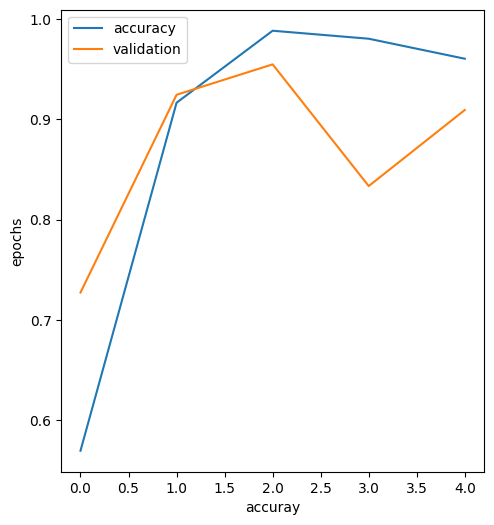

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation')
plt.xlabel('accuray')
plt.ylabel('epochs')
plt.legend()
plt.show()



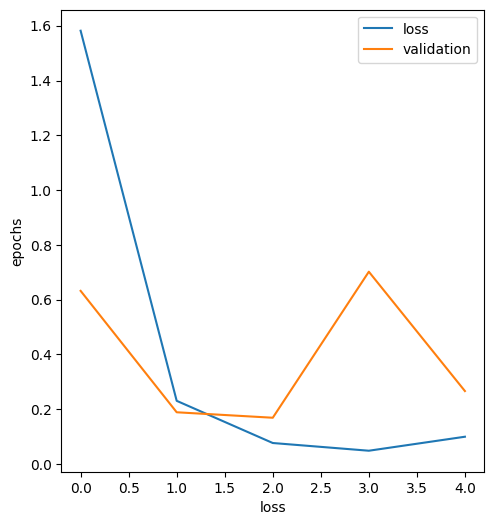

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend()
plt.show()